PARTIE 1

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
import numpy as np

digits = load_digits()

D = np.shape(digits.data)[1]

print("La dimension des données est : ", D)

La dimension des données est :  64


In [ ]:
digits = load_digits()

N = np.bincount(digits.target)

print("Le nombre d'exemples par classe est : ", N)

Le nombre d'exemples par classe est :  [178 182 177 183 181 182 181 179 174 180]


<Figure size 432x288 with 0 Axes>

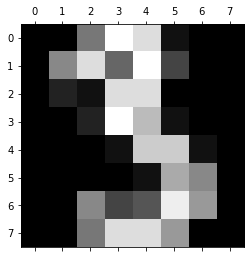

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[3]) 


In [ ]:
X = digits.data
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
y = digits.target
print(y)

[0 1 2 ... 8 9 8]


PARTIE 2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Dimensions de l'ensemble d'apprentissage : ", X_train.shape)
print("Dimensions de l'ensemble de test : ", X_test.shape)


Dimensions de l'ensemble d'apprentissage :  (1257, 64)
Dimensions de l'ensemble de test :  (540, 64)


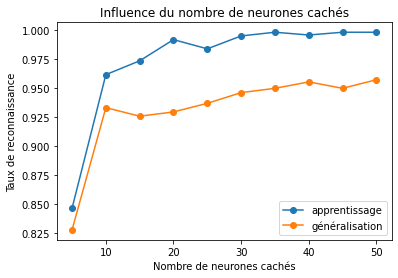

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
hidden_layer_sizes = range(5, 51, 5)

# Initialiser des listes pour stocker les taux de reconnaissance en apprentissage et en généralisation
train_scores = []
test_scores = []

# Pour chaque nombre de neurones cachés à tester
for size in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=size, activation='tanh', solver='sgd', batch_size=1,
                        alpha=0, learning_rate='adaptive', verbose=0, max_iter=1000)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(hidden_layer_sizes, train_scores, 'o-', label='apprentissage')
plt.plot(hidden_layer_sizes, test_scores, 'o-', label='généralisation')
plt.xlabel('Nombre de neurones cachés')
plt.ylabel('Taux de reconnaissance')
plt.title('Influence du nombre de neurones cachés')
plt.legend(loc='best')
plt.show()

PARTIE 3

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données
digits = load_digits()
X = digits.data
y = digits.target

# Séparation des données en apprentissage (80%) et validation croisée (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition des nombres de neurones cachés à tester
hidden_layer_sizes = range(5, 51, 5)

# Initialiser des listes pour stocker les taux de reconnaissance en apprentissage et en validation croisée
train_scores = []
val_scores = []

# Pour chaque nombre de neurones cachés à tester
for size in hidden_layer_sizes:
    
    # Création du modèle de réseau de neurones
    mlp = MLPClassifier(hidden_layer_sizes=(size,), activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=1000, 
                    shuffle=True, random_state=42, tol=0.0001, 
                    early_stopping=True, validation_fraction=0.2)
    
    # Entraînement du modèle par validation croisée avec early stopping
    scores_train = []
    scores_val = []
    for i in range(10):
        mlp.fit(X_train, y_train)
        scores_train.append(mlp.score(X_train, y_train))
        scores_val.append(mlp.score(X_val, y_val))
    
    # Calcul de la moyenne et de l'écart-type des taux en apprentissage et en validation croisée
    train_score_mean = np.mean(scores_train)
    val_score_mean = np.mean(scores_val)
    train_score_std = np.std(scores_train)
    val_score_std = np.std(scores_val)
    
    train_scores.append(train_score_mean)
    val_scores.append(val_score_mean)


print("Moyenne est : ", train_scores)

print("écart-type est : ", val_scores)



Moyenne est :  [0.8093249826026444, 0.9234516353514266, 0.9095337508698677, 0.9707724425887265, 0.9756437021572723, 0.9888656924147531, 0.9805149617258178, 0.9763395963813501, 0.9888656924147531, 0.9791231732776617]
écart-type est :  [0.7833333333333333, 0.8972222222222224, 0.8555555555555555, 0.9416666666666667, 0.9388888888888888, 0.9666666666666666, 0.9499999999999998, 0.9472222222222223, 0.961111111111111, 0.9444444444444444]


PARTIE 4

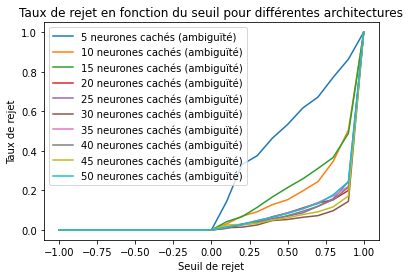

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

hidden_layer_sizes = range(5, 51, 5)

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
test_scores = []
reject_thresholds = np.arange(-1, 1.1, 0.1)

for size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=(size,), activation='relu', solver='adam', 
                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
                    learning_rate_init=0.001, power_t=0.5, max_iter=1000, 
                    shuffle=True, random_state=42, tol=0.0001, 
                    early_stopping=True, validation_fraction=0.2)

    mlp.fit(X_train, y_train)

    train_score = mlp.score(X_train, y_train)
    test_score = mlp.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # Rejet de distance
    max_distances = np.max(mlp.predict_proba(X_test), axis=1)
    rejection_rates_distance = []
    for th in reject_thresholds:
        rejected = np.sum(max_distances < th)
        rejection_rate = rejected / len(X_test)
        rejection_rates_distance.append(rejection_rate)
    
    
    # Rejet d'ambiguïté
    y_pred_proba = mlp.predict_proba(X_test)
    max_probas = np.max(y_pred_proba, axis=1)
    top2_probas = np.partition(y_pred_proba, -2, axis=1)[:, -2]
    max_top2_diff = max_probas - top2_probas
    rejection_rates_ambiguity = []
    for th in reject_thresholds:
        rejected = np.sum(max_top2_diff < th)
        rejection_rate = rejected / len(X_test)
        rejection_rates_ambiguity.append(rejection_rate)
    
    plt.plot(reject_thresholds, rejection_rates_ambiguity, label='{} neurones cachés (ambiguïté)'.format(size))

plt.xlabel('Seuil de rejet')
plt.ylabel('Taux de rejet')
plt.title('Taux de rejet en fonction du seuil pour différentes architectures')
plt.legend()
plt.show()
